# Zillow Notebook

### James Allen


## Notebook Agenda

1. Exective Summary
2. Import Zillow Data
3. Wrangle Zillow Data
4. Data Exploration and Visuals
5. Data Modeling
6. Conclusion / Next Steps

# 1. Executive Summary

- This is where I will write my executive summary 
- goals
- takeaways / key findings
- recommendations

In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import scipy.stats as stats

from env import host, user, password
import acquire
import wrangle_zillow

# 2. Import the Zillow Data

In [2]:
# getting zillow data from acquire file
df = acquire.get_zillow_data()

In [3]:
df.head() #check_yo_head

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,261.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,261.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,261.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30
3,12177905,-0.103410,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,261.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51
4,12095076,-0.001011,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,261.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26


In [4]:
# taking a look at the shape of the zillow data
df.shape

(52442, 18)

In [5]:
# looking at the columns in the zillow data
df.columns

Index(['parcelid', 'logerror', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertylandusetypeid', 'regionidcity',
       'regionidcounty', 'regionidzip', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount'],
      dtype='object')

## Import Takeaways

- brought in zillow single unit properties from codeup database using my acquire.py file
- there are 18 columns and 52442 rows in the data
- now that we have the zillow data we can move into wrangle

# 3. Wrangle Zillow Data

In [6]:
# using my wrangle_zillow file and clean_zillow function on my zillow data
# set index to 'parcelid', handled missing values, dropped nulls, get latitude/longitude
df = wrangle_zillow.clean_zillow(df)

In [7]:
df.head() #check_yo_head

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
parcelid,,,,,,,,,,,,,,,,,
14297519,0.025595,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,261.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72
17052889,0.055619,1.0,2.0,1465.0,6111.0,34.449266,-119.281531,12647.0,261.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48
14186244,0.005383,2.0,3.0,1243.0,6059.0,33.886168,-117.823170,8432.0,261.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30
12177905,-0.103410,3.0,4.0,2376.0,6037.0,34.245180,-118.240722,13038.0,261.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51
12095076,-0.001011,3.0,4.0,2962.0,6037.0,34.145202,-118.179824,63000.0,261.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26


In [8]:
# taking a look at the shape of the clean_zillow data
df.shape

(50913, 17)

In [9]:
# now using my prepare_zillow function from wrangle_zillow to add counties to the data
df = wrangle_zillow.prepare_zillow(df)

In [10]:
df.head() #check_yo_head

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura
parcelid,,,,,,,,,,,,,,,,,,,,
14297519,0.025595,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,261.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0,1,0
17052889,0.055619,1.0,2.0,1465.0,6111.0,34.449266,-119.281531,12647.0,261.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48,0,0,1
14186244,0.005383,2.0,3.0,1243.0,6059.0,33.886168,-117.823170,8432.0,261.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30,0,1,0
12177905,-0.103410,3.0,4.0,2376.0,6037.0,34.245180,-118.240722,13038.0,261.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51,1,0,0
12095076,-0.001011,3.0,4.0,2962.0,6037.0,34.145202,-118.179824,63000.0,261.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26,1,0,0


In [11]:
# using create_features to help in explore
df = wrangle_zillow.create_features(df)

In [12]:
df.head() #check_yo_head

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
parcelid,,,,,,,,,,,,,,,,,,,,,
14297519,0.025595,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,261.0,53571.0,...,1.076313,0.103444,0.1,0.7,156.681613,0.5,119.300710,0.5,0.875000,0
17052889,0.055619,1.0,2.0,1465.0,6111.0,34.449266,-119.281531,12647.0,261.0,13091.0,...,1.222517,0.290335,0.3,0.3,60.068259,0.2,29.730371,0.3,0.500000,0
14186244,0.005383,2.0,3.0,1243.0,6059.0,33.886168,-117.823170,8432.0,261.0,21412.0,...,1.148823,0.193572,0.2,0.2,68.615447,0.2,56.865394,0.4,0.666667,0
12177905,-0.103410,3.0,4.0,2376.0,6037.0,34.245180,-118.240722,13038.0,261.0,396551.0,...,1.224661,0.299311,0.3,0.5,45.840909,0.1,2.778417,0.1,0.750000,0
12095076,-0.001011,3.0,4.0,2962.0,6037.0,34.145202,-118.179824,63000.0,261.0,47019.0,...,1.230599,1.446281,0.5,0.6,93.411209,0.3,7.882841,0.2,0.750000,0


In [13]:
# removed outliers for bathrooms, bedrooms, square feet, taxrate, and acres
df = wrangle_zillow.remove_outliers(df)

In [14]:
df.head() #check_yo_head

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
parcelid,,,,,,,,,,,,,,,,,,,,,
14297519,0.025595,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,261.0,53571.0,...,1.076313,0.103444,0.1,0.7,156.681613,0.5,119.300710,0.5,0.875000,0
17052889,0.055619,1.0,2.0,1465.0,6111.0,34.449266,-119.281531,12647.0,261.0,13091.0,...,1.222517,0.290335,0.3,0.3,60.068259,0.2,29.730371,0.3,0.500000,0
14186244,0.005383,2.0,3.0,1243.0,6059.0,33.886168,-117.823170,8432.0,261.0,21412.0,...,1.148823,0.193572,0.2,0.2,68.615447,0.2,56.865394,0.4,0.666667,0
12177905,-0.103410,3.0,4.0,2376.0,6037.0,34.245180,-118.240722,13038.0,261.0,396551.0,...,1.224661,0.299311,0.3,0.5,45.840909,0.1,2.778417,0.1,0.750000,0
12095076,-0.001011,3.0,4.0,2962.0,6037.0,34.145202,-118.179824,63000.0,261.0,47019.0,...,1.230599,1.446281,0.5,0.6,93.411209,0.3,7.882841,0.2,0.750000,0


In [15]:
# looking at the new shape of the wrangled zillow data
df.shape

(50677, 32)

In [16]:
# now I can split my data and move into explore
# using my_train_test_split(df) funtion
train, validate, test = wrangle_zillow.my_train_test_split(df)

train size:  908096
validate size:  389216
test size:  324352


## Wrangle Takeaways

- cleaned zillow data, set index to 'parcelid', removed nulls and missing values
- added latitude / longitude and counties to data
- added features and removed outliers on data
- split data into train, validate, and test

# 4. Data Exploration and Visuals

In [17]:
train.head() #check_yo_head

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,...,taxrate,acres,acres_bin,sqft_bin,structure_dollar_per_sqft,structure_dollar_sqft_bin,land_dollar_per_sqft,lot_dollar_sqft_bin,bath_bed_ratio,cola
parcelid,,,,,,,,,,,,,,,,,,,,,
14357041,-0.001358,3.5,3.0,2820.0,6059.0,33.701815,-117.717952,5492.0,261.0,52650.0,...,1.435365,0.126079,0.1,0.6,167.602837,0.5,119.641843,0.5,1.166667,0
11185767,0.044035,4.0,4.0,2764.0,6037.0,34.610159,-118.192962,6624.0,261.0,40227.0,...,1.756942,0.152066,0.2,0.6,37.442475,0.1,9.500302,0.2,1.000000,0
11471750,0.026075,3.0,4.0,2044.0,6037.0,33.924794,-118.423837,4967.0,261.0,55753.0,...,1.118434,0.114027,0.1,0.5,169.431996,0.5,158.594725,0.5,0.750000,0
14234304,-0.051115,3.0,4.0,1622.0,6059.0,33.795264,-117.827395,7399.0,261.0,33252.0,...,1.110092,0.169858,0.2,0.4,64.356350,0.2,46.887282,0.3,0.750000,0
12992951,0.110311,2.0,3.0,1050.0,6037.0,34.048144,-117.985938,5871.0,261.0,118895.0,...,1.282477,0.134780,0.1,0.2,89.523810,0.3,48.203032,0.3,0.666667,0


In [18]:
# taking a look at the train data shape
train.shape

(28378, 32)

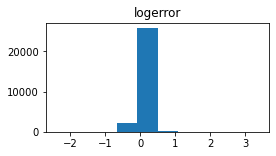

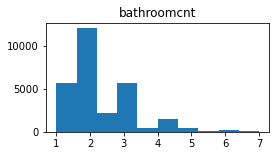

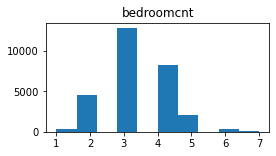

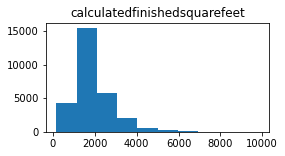

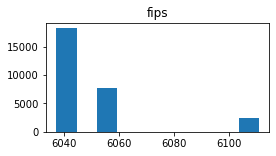

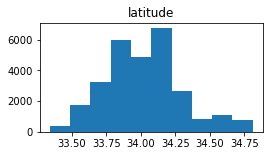

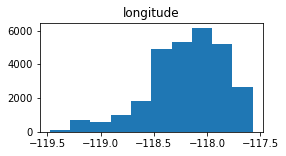

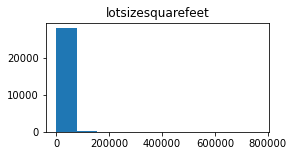

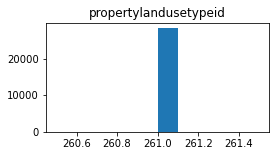

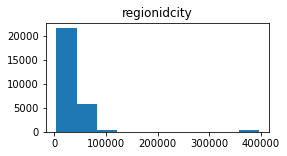

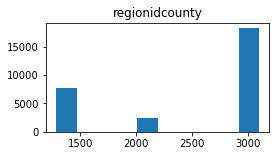

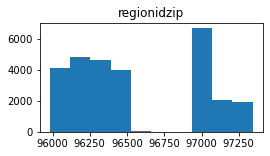

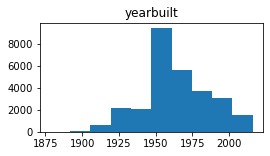

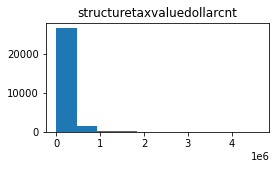

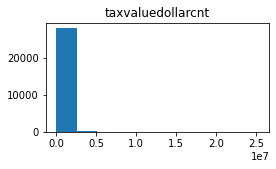

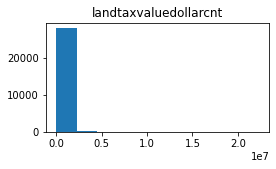

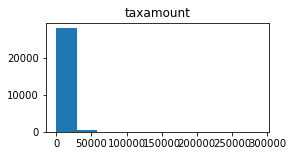

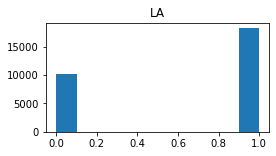

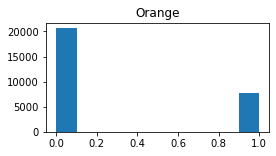

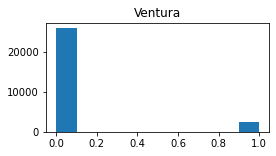

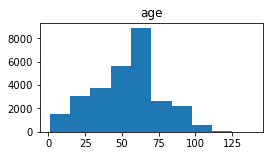

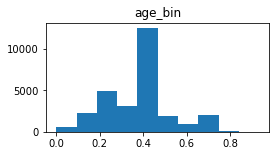

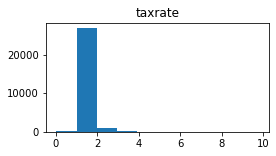

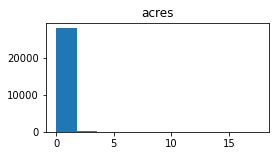

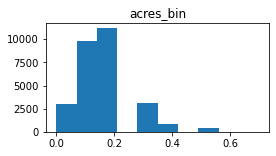

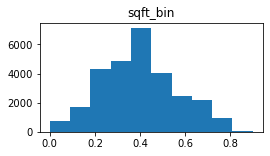

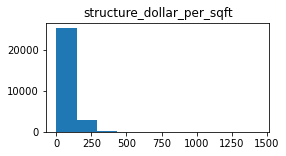

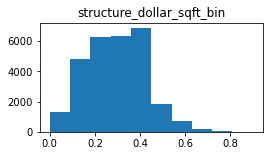

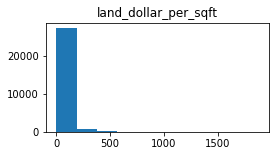

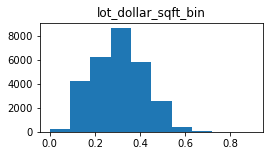

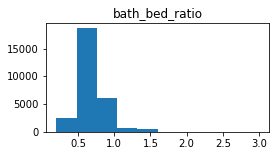

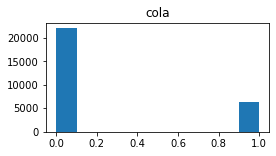

In [19]:
# what is the distribution of each variable
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

<AxesSubplot:title={'center':'Correlation Features For Single Family Residential Properties'}>

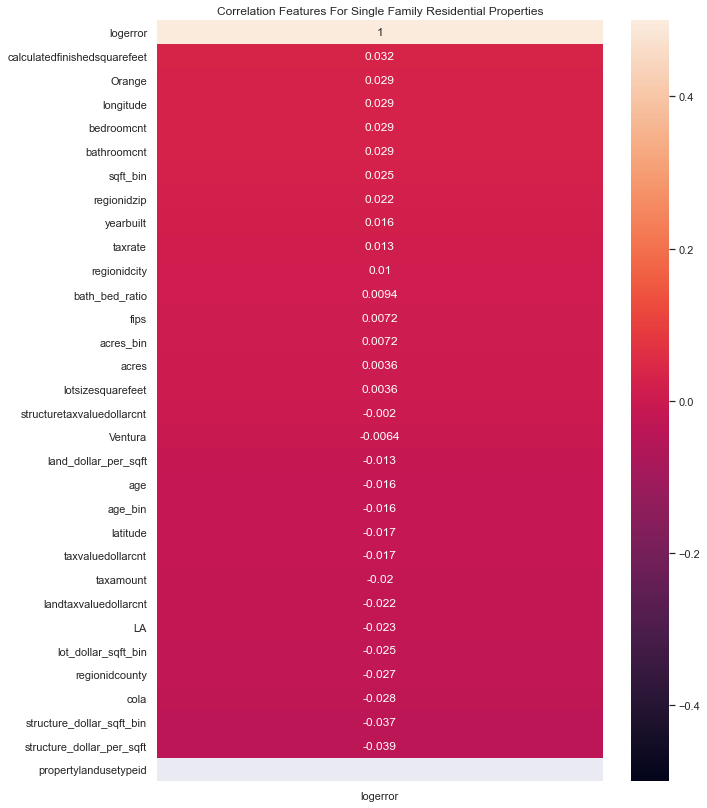

In [20]:
# making a heatmap of the train data
wrangle_zillow.get_zillow_heatmap(train)

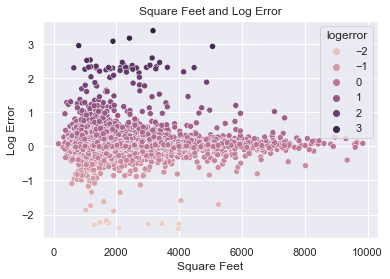

In [21]:
# scatter plot of number of bathrooms and logerror
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, hue='logerror')
plt.xlabel('Square Feet')
plt.ylabel('Log Error')
plt.title('Square Feet and Log Error')
plt.show()

<AxesSubplot:title={'center':'Number of Bathrooms and Log Error'}, xlabel='Number of Bathrooms', ylabel='Log Error'>

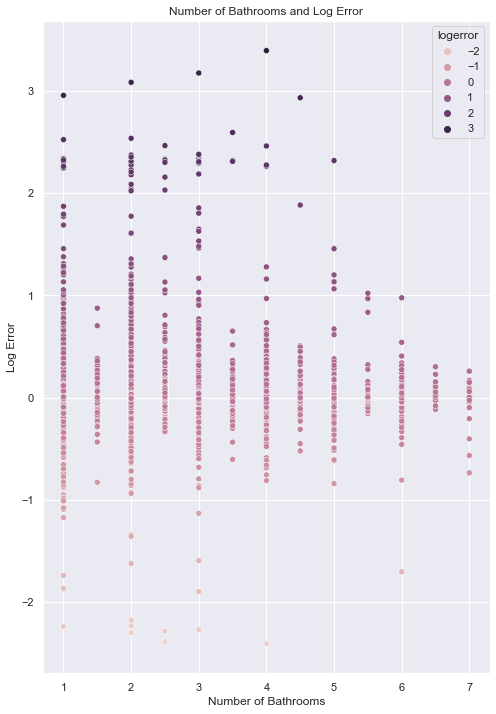

In [22]:
wrangle_zillow.get_zillow_scatter_bath(train)

<AxesSubplot:title={'center':'Number of Bedrooms and Log Error'}, xlabel='Number of Bedrooms', ylabel='Log Error'>

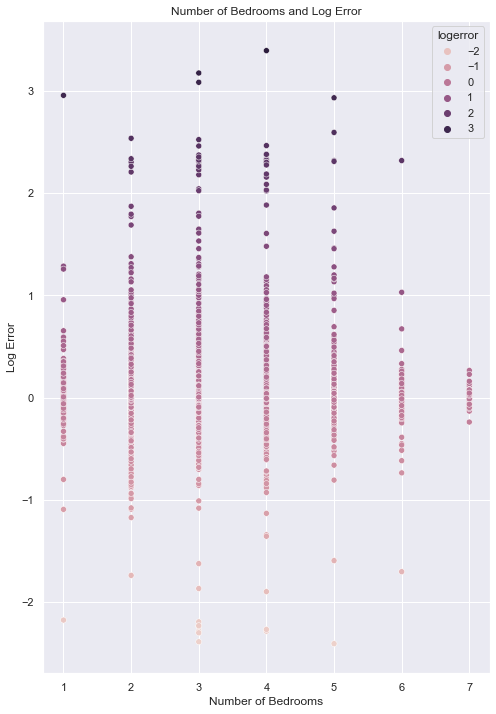

In [23]:
wrangle_zillow.get_zillow_scatter_bed(train)

In [24]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'regionidcity', 'regionidcounty',
       'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'LA',
       'Orange', 'Ventura', 'age', 'age_bin', 'taxrate', 'acres', 'acres_bin',
       'sqft_bin', 'structure_dollar_per_sqft', 'structure_dollar_sqft_bin',
       'land_dollar_per_sqft', 'lot_dollar_sqft_bin', 'bath_bed_ratio',
       'cola'],
      dtype='object')

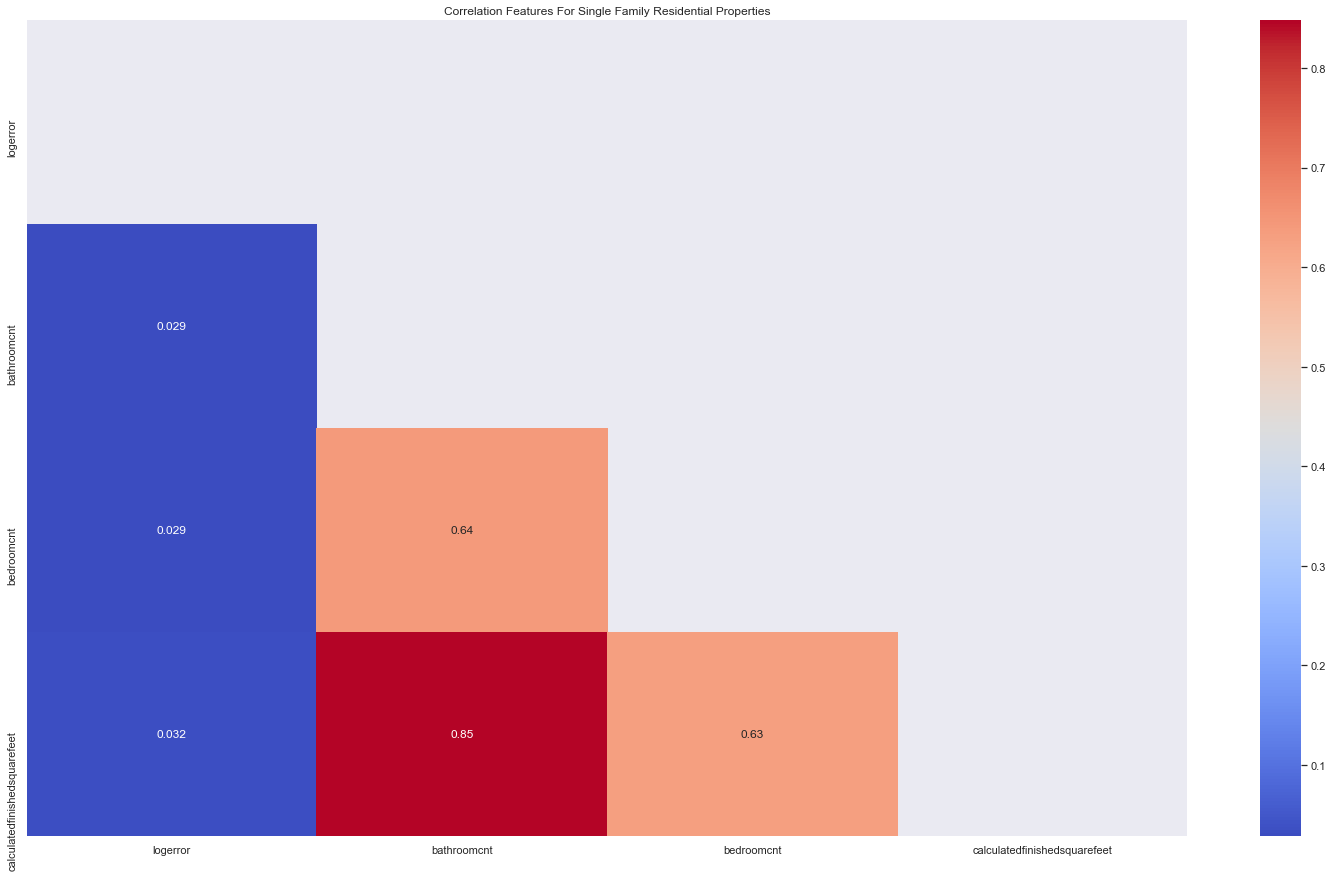

In [25]:
# plotting the correlation between logerror, bathroomcnt, bedroomcnt, and calculatedfinishedsquarefeet
train_1 = train.drop(columns = ['propertylandusetypeid',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'regionidcity', 'regionidcounty',
       'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'LA',
       'Orange', 'Ventura', 'age', 'age_bin', 'taxrate', 'acres', 'acres_bin',
       'sqft_bin', 'structure_dollar_per_sqft', 'structure_dollar_sqft_bin',
       'land_dollar_per_sqft', 'lot_dollar_sqft_bin', 'bath_bed_ratio',
       'cola'])

correlations = train_1.corr()
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("dark"):

    f, ax = plt.subplots(figsize=(26, 15))
    ax = sns.heatmap(correlations,
                     mask=mask,
                     annot=True,
                     fmt='.2',
                     cmap='coolwarm'
                    )
    plt.title('Correlation Features For Single Family Residential Properties')

<AxesSubplot:>

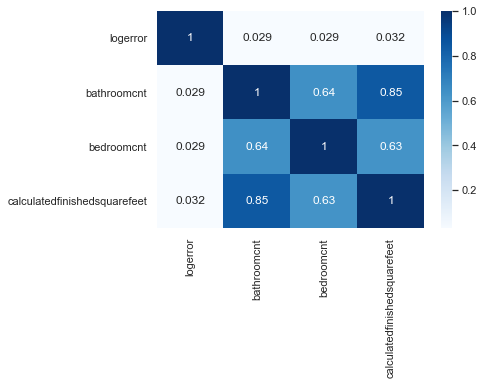

In [26]:
# creating a heatmap to show correlations
correlation_table = train_1.corr()
# sns.heatmap(correlation_table, cmap='Blues', annot=True, vmin=0, vmax=1)
sns.heatmap(correlation_table, cmap='Blues', annot=True)

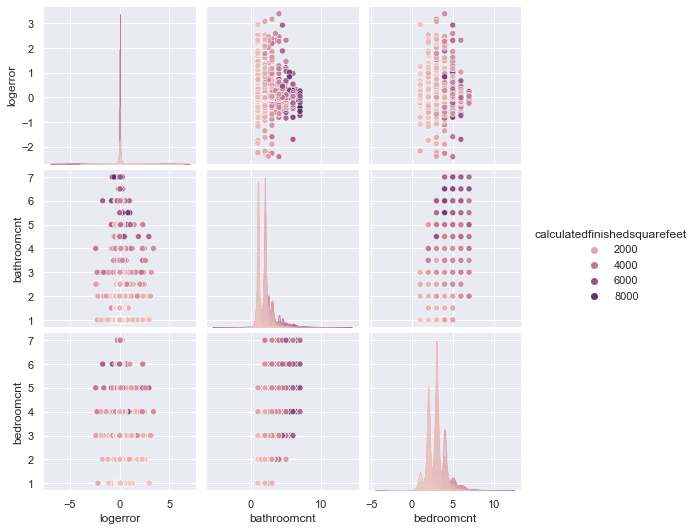

In [27]:
# making a pair plot to visualize the zillow data
sns.pairplot(train_1, hue='calculatedfinishedsquarefeet')

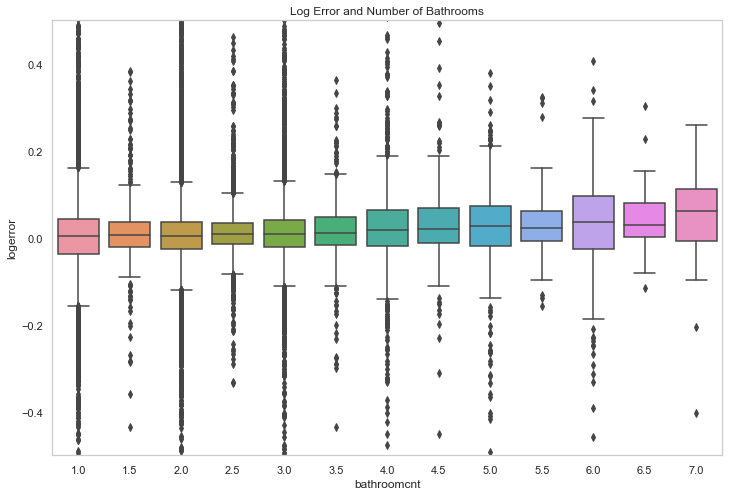

In [28]:
# boxplot of logerror and number of bathrooms
plt.figure(figsize=(12,8))
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(train.bathroomcnt, train.logerror)
plt.title('Log Error and Number of Bathrooms')
plt.ylim(-.5, .5)
plt.show()

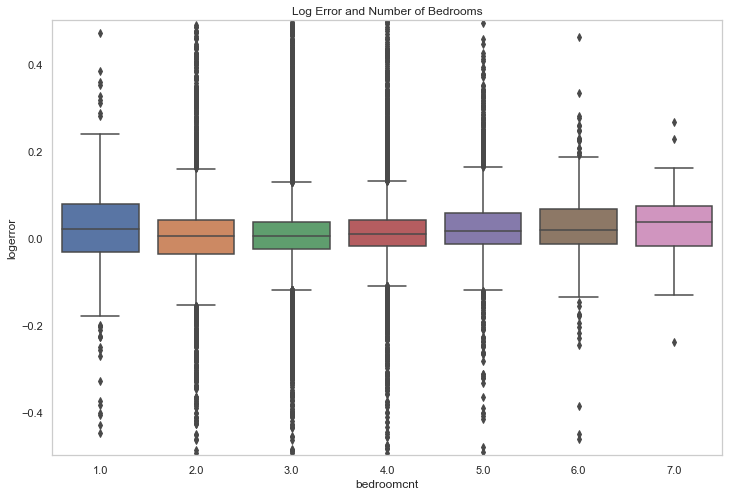

In [29]:
# boxplot of logerror and number of bedrooms
plt.figure(figsize=(12,8))
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.boxplot(train.bedroomcnt, train.logerror)
plt.title('Log Error and Number of Bedrooms')
plt.ylim(-.5, .5)
plt.show()

## Hypothesis and Testing

### 1. I want to test the correlation between number of bathrooms and log error
- $H_O$: There is not a linear correlation between number of bathrooms and log error.
- $H_A$: There is a linear correlation between number of bathrooms and log error.

In [30]:
# setting my alpha to .05
alpha = .05

In [31]:
# pearsonr test for number of bathrooms and logerror
corr, p = stats.pearsonr(train.bathroomcnt, train.logerror)

print('corr_value:', corr)
print('p_value:', round(p, 2))

if p < alpha:
    print(f'\nWe can reject the null hypothesis.')
else:
    print(f'\nWe fail to reject the null hypothesis.')

corr_value: 0.028777728577438783
p_value: 0.0

We can reject the null hypothesis.


### 2. I want to test the correlation between number of bedrooms and log error
- $H_O$: There is not a linear correlation between number of bedrooms and log error.
- $H_A$: There is a linear correlation between number of bedrooms and log error.

In [32]:
# pearsonr test for number of bedrooms and logerror
corr, p = stats.pearsonr(train.bedroomcnt, train.logerror)

print('corr_value:', corr)
print('p_value:', round(p, 2))

if p < alpha:
    print(f'\nWe can reject the null hypothesis.')
else:
    print(f'\nWe fail to reject the null hypothesis.')

corr_value: 0.02878533172855258
p_value: 0.0

We can reject the null hypothesis.


### 3. I want to test the correlation between square feet and log error
- $H_O$: There is not a linear correlation between square feet and log error.
- $H_A$: There is a linear correlation between square feet and log error.

In [33]:
# pearsonr test for square feet and logerror
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)

print('corr_value:', corr)
print('p_value:', round(p, 5))

if p < alpha:
    print(f'\nWe can reject the null hypothesis.')
else:
    print(f'\nWe fail to reject the null hypothesis.')

corr_value: 0.03219313523614255
p_value: 0.0

We can reject the null hypothesis.


## Exploration Takeaways
- focused on number of bathrooms, number of bedrooms, and square feet 
- Reject all 3 null hypothesis:
    - 𝐻𝑂 : There is not a linear correlation between number of bathrooms and log error.
    - 𝐻𝑂 : There is not a linear correlation between number of bedrooms and log error.
    - 𝐻𝑂 : There is not a linear correlation between square feet and log error.


In [34]:

# Scale the data after dropping logerror
train_scaled, validate_scaled, test_scaled = wrangle_zillow.scale_my_data(train, validate, test)

In [35]:
train, validate, test = wrangle_zillow.create_clusters(train, validate, test)

In [36]:

# split into X variables and y target

# X is every column except log_error
X_train = train_scaled
# y is only log error, [[]] to keep as df and not series
y_train = train[['logerror']]

# repeat for validate and test
X_validate = validate_scaled
y_validate = validate[['logerror']]

X_test = test_scaled
y_test = test[['logerror']]

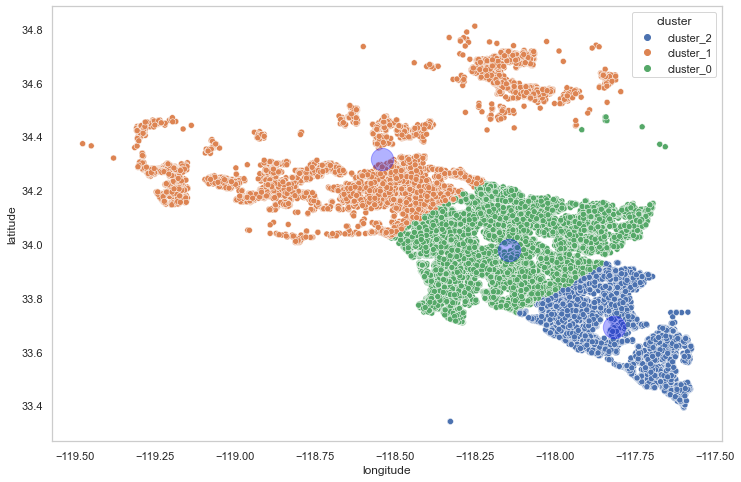

In [42]:
# clusters using longitude and latitude to create scatter plot
X = train[['longitude', 'latitude']]
train, X_scaled, scaler, kmeans, centroids = wrangle_zillow.create_cluster(train, X, 3)
wrangle_zillow.create_scatter_plot('longitude','latitude',train,kmeans, X_scaled, scaler)